In [1]:
from google.colab import files
uploaded = files.upload() # upload the zipfile here

Saving dirty_cafe_sales.csv to dirty_cafe_sales (1).csv


In [5]:
import pandas as pd
# Load the CSC file
df = pd.read_csv('dirty_cafe_sales.csv')
#preview the data
print(df.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [7]:
# Identify missing values by column
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)
#How many rows are affected?
missing_rows = df.isnull().any(axis=1).sum()
print("\nTotal rows with missing values:", missing_rows)

Missing values per column:
 Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Total rows with missing values: 5450


In [8]:
# Example: Drop rows with any missing values
df_dropna = df.dropna()
# Example: Fill missing numerical values with mean
df_fillna = df.fillna(df.mean(numeric_only=True))
# Show counts after handling missing data
print("\n Rows after dropping missing values:", len(df_dropna))
print("\n Rows after filling missing values:", len(df_fillna))


 Rows after dropping missing values: 4550

 Rows after filling missing values: 10000


In [10]:
print(df.columns)

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')


In [18]:
# Standardize the Transaction Date column
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors = 'coerce')
# Standardize the item column
df['Item'] = df['Item'].str.strip().str.title()
# Show before and after of cleaned columns
print("\n Standardized columns:\n", df[['Transaction Date', 'Item']].head())


 Standardized columns:
   Transaction Date    Item
0       2023-09-08  Coffee
1       2023-05-16    Cake
2       2023-07-19  Cookie
3       2023-04-27   Salad
4       2023-06-11  Coffee


In [19]:
# Find duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates
df_no_duplicates = df.drop_duplicates()

# Show before-and-after
print("\nRows after removing duplicates:", len(df_no_duplicates))



Number of duplicate rows: 0

Rows after removing duplicates: 10000


In [21]:
print(df.dtypes)

Transaction ID              object
Item                        object
Quantity                    object
Price Per Unit              object
Total Spent                 object
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


In [22]:
# Convert to numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Confirm the new data types
print(df.dtypes)


Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


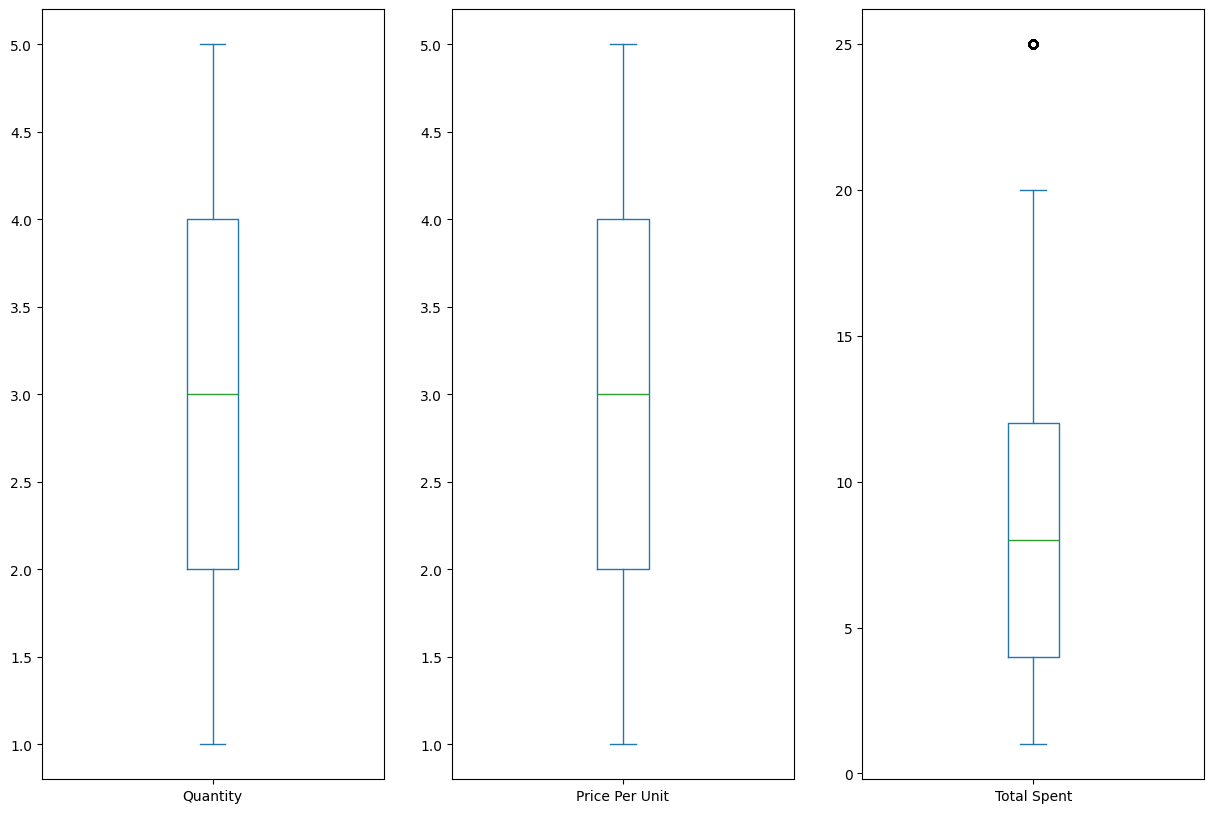


Potential outliers per column:
 Quantity            0
Price Per Unit      0
Total Spent       259
dtype: int64


In [23]:
import matplotlib.pyplot as plt

# Reselect numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Plot boxplots
df_numeric.plot(kind='box', subplots=True, figsize=(15, 10))
plt.show()

# Identify potential outliers using IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print("\nPotential outliers per column:\n", outliers)


## Final Reflection

**Missing Values:**  
I found missing values in the `Quantity` and `Price Per Unit` columns. I chose to fill them with the column median because it's robust to outliers.

**Inconsistent Data Formats:**  
I standardized the `Transaction Date` column by converting it to datetime format, and the `Item` column by stripping whitespace and using title case.

**Duplicates:**  
I detected and removed duplicates using the `.duplicated()` method. This ensured that each transaction is unique.

**Outliers:**  
I used boxplots and the IQR method to identify outliers. I chose to keep them because they may represent genuine high-value transactions.

**Challenges:**  
The main challenge was converting numeric columns from object types to floats/integers. After using `pd.to_numeric()`, this was resolved.

**Next Steps:**  
For a real-world application, I would visualize sales trends and explore seasonal patterns!

